In [17]:
import matplotlib.pyplot as plt

In [28]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.init

In [9]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [10]:
learning_rate = 0.1
training_epochs = 15
batch_size = 100

In [13]:
mnist_train = dsets.MNIST(root = 'MNIST_data/', train = True, transform = transforms.ToTensor(), download = True)

mnist_test = dsets.MNIST(root = 'MNIST_data/', train = False, transform = transforms.ToTensor(), download = True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST\raw\train-images-idx3-ubyte.gz to MNIST_data/MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST\raw\train-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST_data/MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw



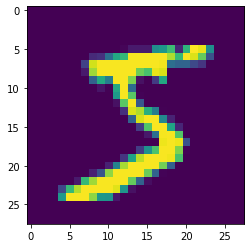

In [21]:
plt.imshow(mnist_train[0][0][0])

In [23]:
data_loader = torch.utils.data.DataLoader(dataset = mnist_train, batch_size = batch_size, shuffle = True, drop_last = True)

In [51]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(nn.Conv2d(1, 32, kernel_size = 3, stride = 1, padding = 1),
                                   nn.ReLU(),
                                   nn.MaxPool2d(2))
        self.layer2 = nn.Sequential(nn.Conv2d(32, 64, kernel_size = 3, stride = 1, padding = 1),
                                   nn.ReLU(),
                                   nn.MaxPool2d(2))
        self.fc = nn.Linear(7 * 7 * 64, 10, bias = True)
        torch.nn.init.xavier_uniform(self.fc.weight)
    
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

In [52]:
model = CNN().to(device)

C:\Users\f35js\AppData\Local\Temp/ipykernel_6956/686922553.py:11: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(self.fc.weight)


In [33]:
model

CNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=3136, out_features=10, bias=True)
)

In [53]:
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=  learning_rate)

In [56]:
#training
total_batch = len(data_loader)

for epoch in range(200):
    avg_cost = 0
    for X, Y in data_loader:
        X = X.to(device)
        Y = Y.to(device)
        
        optimizer.zero_grad()
        hypothesis = model(X)
        
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()
        
        avg_cost += cost / total_batch
        
    print('epoch : {} cost : {}'.format(epoch, cost))



epoch : 0 cost : 0.2521374523639679
epoch : 1 cost : 0.28696542978286743
epoch : 2 cost : 0.28368163108825684
epoch : 3 cost : 0.38641220331192017
epoch : 4 cost : 0.21587270498275757
epoch : 5 cost : 0.421916127204895
epoch : 6 cost : 0.45355406403541565
epoch : 7 cost : 0.2686602473258972
epoch : 8 cost : 0.44547516107559204
epoch : 9 cost : 0.3349841833114624
epoch : 10 cost : 0.40356895327568054
epoch : 11 cost : 0.2728825807571411
epoch : 12 cost : 0.28231701254844666
epoch : 13 cost : 0.20620393753051758
epoch : 14 cost : 0.38985493779182434
epoch : 15 cost : 0.3035949468612671
epoch : 16 cost : 0.32438740134239197
epoch : 17 cost : 0.3797692060470581
epoch : 18 cost : 0.5274409055709839
epoch : 19 cost : 0.2975194454193115
epoch : 20 cost : 0.474336177110672
epoch : 21 cost : 0.34770500659942627
epoch : 22 cost : 0.20066596567630768
epoch : 23 cost : 0.49329236149787903
epoch : 24 cost : 0.25377023220062256
epoch : 25 cost : 0.25097012519836426
epoch : 26 cost : 0.38518807291984

In [46]:
for X, Y in data_loader:
    print(model(X.cuda()))

tensor([[18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.8147, 19.9555, 19.6940,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.5470, 18.7400,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.7572,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.6373,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.5470, 18.5470

tensor([[18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 19.4736,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5564, 20.4033,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.7120, 19.2407,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.7120, 19.7370,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5688,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 19.2856,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.7070, 19.1628

tensor([[18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.9011,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.6637,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 19.8101,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.5470, 19.4642

tensor([[18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 18.8512, 20.5432,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.7338,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 18.5502, 19.2511,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 19.0502,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.5470, 19.8336

tensor([[18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 18.5470, 18.7836,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.5470, 19.0386

tensor([[18.5470, 18.5470, 18.6093,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 19.0584,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 20.3450,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.5470, 18.5470

tensor([[18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5688,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 20.4227, 20.5236,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 18.5470, 19.2842,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.6591, 19.8993,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.5470, 18.7898

tensor([[18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5626, 19.2832,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.9609,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.5470, 18.5470

tensor([[18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.6809, 19.4104,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 19.0584, 19.1155,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 19.4510,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.7777,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.6031, 18.7649,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.5470, 19.5201

tensor([[18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 18.5470, 19.0142,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 19.2543,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.5470, 19.3495,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 15.5200,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.5470, 18.5470

tensor([[18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.8457,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.8841, 19.7473,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 21.2678,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.5470, 19.5256

tensor([[18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 18.5470, 18.9976,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.5470, 18.5470

tensor([[18.5470, 18.6622, 18.6489,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.6820, 19.8024,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.5470,  5.9957,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 19.1316,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 19.3869, 19.6783,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 19.2770,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.5470, 18.5470

tensor([[18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 20.5375,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 18.5470, 19.4461,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.5470, 18.5470

tensor([[18.5470, 18.5470, 18.6155,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 19.2241,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 19.0788,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 19.3509, 19.5103,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.5470, 18.5470

tensor([[18.5470, 18.5470, 18.9631,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 18.5813, 21.0324,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 20.1786,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5595,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.5470, 18.5751

tensor([[18.5470, 18.5470, 19.0979,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 19.2729, 19.7408,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.8559, 20.9171,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [19.4685, 21.3702, 20.3198,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.6093, 19.3034,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.5470, 18.5470

tensor([[18.5470, 18.5470, 18.8135,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5502, 19.0640,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.9463,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 19.5185, 18.4618,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.5470, 18.5470

tensor([[18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.6684,  ...,  0.0000,  0.0000,  0.0000],
        [18.6933, 19.2757, 18.7665,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 20.3196, 21.3039,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 19.6941, 12.7988,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.5470, 18.5470

tensor([[18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 18.5470, 18.8399,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.5470, 18.5470

tensor([[18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 18.5470, 19.8163,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 19.2110,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.6778,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 20.0045,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.5470, 18.6746

tensor([[18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 19.5977,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5626, 19.2208,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.5470, 19.3503,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 19.3083,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 19.1623,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.5470, 18.5470

tensor([[18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.7269,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.5470, 20.2255,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 19.0271, 19.9655,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 18.6093, 18.1696,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 19.3149,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.5470, 18.5470

tensor([[18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 19.1757, 19.7419,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.7788,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 18.5470, 19.0863,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.6995,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.5470, 19.2661

tensor([[18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 19.3892, 20.4870,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.8147,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5688,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.5470, 18.5470

tensor([[18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 18.6892, 19.1192,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 18.5470, 18.6311,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.5470, 20.2803

tensor([[18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 19.2110,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.5470, 18.6435,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 19.7033,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.9104, 19.9927

tensor([[18.5470, 18.5470, 19.3442,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.7701, 18.8577,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5564,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 18.5470, 18.8536,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.5470, 18.5470

tensor([[18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.7640,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.6964,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5941,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.5470, 20.9980

tensor([[18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 19.0903, 19.7485,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 19.4262,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.5470, 19.3892,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000],
        [18.5470, 18.5470, 18.5470,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ViewBackward0>)
tensor([[18.5470, 18.5470, 18.5470

In [55]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(len(mnist_test), 1, 28, 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)
    
    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy : ', accuracy.item())

Accuracy :  0.6322000026702881
